<a href="https://colab.research.google.com/github/AnasTere/Data_Sci/blob/main/Tereschenko_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [9]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [10]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [11]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device)
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [12]:
url = "https://docs.google.com/presentation/d/1W0LODkbsb8gUxcIZ03-s1RLbDu3oSB2W2LGs3ciyfLs/edit#slide=id.p"

In [ ]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [14]:
images.shape #50 pages

torch.Size([50, 3, 224, 224])

In [15]:
model(images)

tensor([[-3.1160, -1.5682, -2.4837,  ..., -4.4568, -0.1342,  2.3417],
        [-2.8214, -0.0831, -2.2358,  ..., -2.6822, -0.0626,  0.9698],
        [ 0.3832,  0.4531, -2.1673,  ..., -2.5195,  0.1401,  0.9634],
        ...,
        [ 0.3832,  0.4531, -2.1673,  ..., -2.5195,  0.1401,  0.9634],
        [ 0.3832,  0.4531, -2.1673,  ..., -2.5195,  0.1401,  0.9634],
        [ 0.3832,  0.4531, -2.1673,  ..., -2.5195,  0.1401,  0.9634]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [16]:
y = model(images) #calls model(images) and stores it in y

In [17]:
y.shape #50 rows, 1000 cols 

torch.Size([50, 1000])

In [18]:
guesses = torch.argmax(y, 1).cpu().numpy()

In [19]:
for i in list(guesses): #displays whats in array guesses at place i
    print(labels[i])

packet
lotion
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
cleaver, meat cleaver, chopper
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
panpipe, pandean pipe, syrinx
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
web site, website, internet site, site
letter opener, paper knife, paperknife
letter opener, paper knife, paperknife
letter opener, paper knife, 

In [20]:
Y = np.zeros(50,) #creates an array with 50 places
Y[25:] = 1 #starting from 25 turn those into 1s

In [21]:
Y #display Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [22]:
X = y.detach().cpu().numpy() 

In [23]:
X.shape #50 rows, 1000 cols 

(50, 1000)

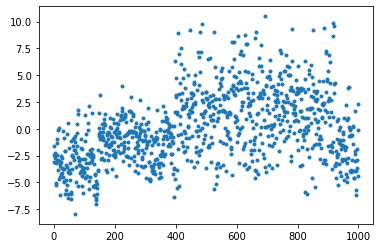

In [24]:
plt.plot(X[0],'.') #plot X

In [25]:
X[0] #Display x starting at place 0

array([-3.11602473e+00, -1.56824493e+00, -2.48371649e+00, -2.69893122e+00,
       -2.47075796e+00, -2.26408672e+00, -5.21579647e+00, -3.23553252e+00,
       -5.03286600e+00, -2.46999002e+00, -9.42137718e-01, -3.00365376e+00,
       -1.31611943e+00, -3.85207272e+00, -1.64074540e-01, -2.94490337e+00,
       -4.65937901e+00,  1.10249460e-01, -2.98966980e+00, -3.26840997e+00,
       -6.21176338e+00, -3.44330192e+00, -4.52433300e+00, -3.10928011e+00,
       -4.18579245e+00, -2.56144118e+00, -4.09511662e+00, -3.67090011e+00,
       -2.74458933e+00, -1.87218696e-01, -3.79612827e+00, -4.48555851e+00,
       -9.04833436e-01, -4.94663715e+00, -3.78491855e+00, -4.90413284e+00,
       -2.08050036e+00, -6.12563133e+00, -2.05139637e+00, -4.80425787e+00,
       -5.69782639e+00, -3.36826825e+00, -3.59553385e+00, -4.77557093e-01,
       -5.28723145e+00,  5.57733297e-01, -6.04759169e+00, -4.05232716e+00,
       -6.41815042e+00, -4.09682417e+00, -3.88148522e+00, -1.83552456e+00,
       -4.81010914e+00, -

In [26]:
np.argmax(X[0]) #find max in array X

692

In [27]:
labels[948] #display whats in place 948 in array labels 

'Granny Smith'

In [28]:
top_ten = np.argsort(X[0])[::-1][0:10]

In [29]:
for i in top_ten: #display array top_ten at place i 
    print(labels[i])

packet
web site, website, internet site, site
cellular telephone, cellular phone, cellphone, cell, mobile phone
book jacket, dust cover, dust jacket, dust wrapper
vending machine
screen, CRT screen
television, television system
binder, ring-binder
monitor
desktop computer


In [30]:
labels #display labels 

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([ 13.,  62., 180., 212., 201., 154., 102.,  42.,  21.,  13.]),
 array([-7.948497  , -6.104324  , -4.260151  , -2.4159782 , -0.57180536,
         1.2723675 ,  3.1165404 ,  4.9607134 ,  6.804886  ,  8.649059  ,
        10.493232  ], dtype=float32),
 <a list of 10 Patch objects>)

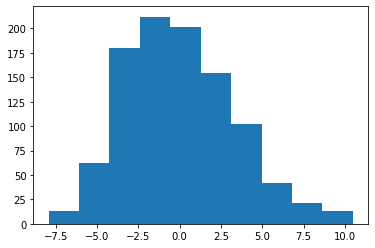

In [31]:
plt.hist(X[0]) #plot X in histogram

In [32]:
X = GPU_data(X)
Y = GPU_data(Y)

In [33]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [34]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [35]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [36]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [37]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [38]:
X.shape

torch.Size([50, 1000])

In [39]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [40]:
def model(x,w):

    return x@w[0]

In [41]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


acc_train,▅█▆▃█▄▅▆▁▇▃▅██▁▁▆▆▄▇▁▃▃▂██▁▇▃▇▄▆▇▆▂▁▁▄█▂
loss,▄▁▃▆▁▅▄▃█▂▆▄▁▁██▃▃▅▂█▆▆▇▁▁█▂▆▂▅▃▂▃▇██▅▁▇
acc_train,0.375
loss,0.93826


<ipython-input-2-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/

In [1]:
three = 0.4819
two = 0.524
one = 0.5859

In [2]:
best = one
average = two
worst = three

In [4]:
best

0.5859

In [5]:
average

0.524

In [6]:
worst

0.4819

In [43]:
url = "https://docs.google.com/presentation/d/1hw1hk86KCoSyX56caq_6jqNCa_2yrXC5XvjT7sFSHuU/edit#slide=id.g1af63e9ef33_0_7"

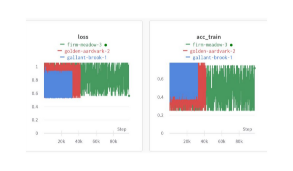

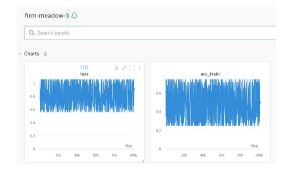

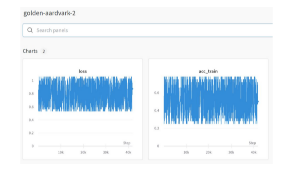

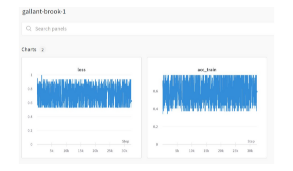

In [44]:
images = []

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)